# Introvert vs Extrovert Data analysis

# Importing Liraries and Modules

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data

In [48]:
df = pd.read_csv(r'/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')

In [49]:
df.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# Data Validation
 - Checking and solving for null values.
 - Checking and checking for column naming convention - snake.
 - Checking for duplicate rows.
 - Checking types for columns (numbers, objects, dates)
 - Value checks - age etc
 - Typos in categorical values.
 - Checking for outliers.

 - Cross column rules - e.g start and end dates make sense.
 - Unique constraints like IDs

## Checking for null values

In [50]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [51]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [52]:
df[df['Time_spent_Alone'].isnull()]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
59,NaN,No,9.0,4.0,No,7.0,5.0,Extrovert
125,NaN,Yes,3.0,0.0,Yes,2.0,1.0,Introvert
171,NaN,No,4.0,7.0,No,7.0,5.0,Extrovert
180,NaN,No,8.0,5.0,No,9.0,4.0,Extrovert
207,NaN,Yes,2.0,2.0,Yes,1.0,2.0,Introvert
...,...,...,...,...,...,...,...,...
2705,NaN,No,9.0,5.0,No,9.0,4.0,Extrovert
2711,NaN,No,4.0,6.0,No,12.0,3.0,Extrovert
2715,NaN,No,6.0,6.0,No,14.0,6.0,Extrovert
2772,NaN,No,7.0,6.0,No,11.0,7.0,Extrovert


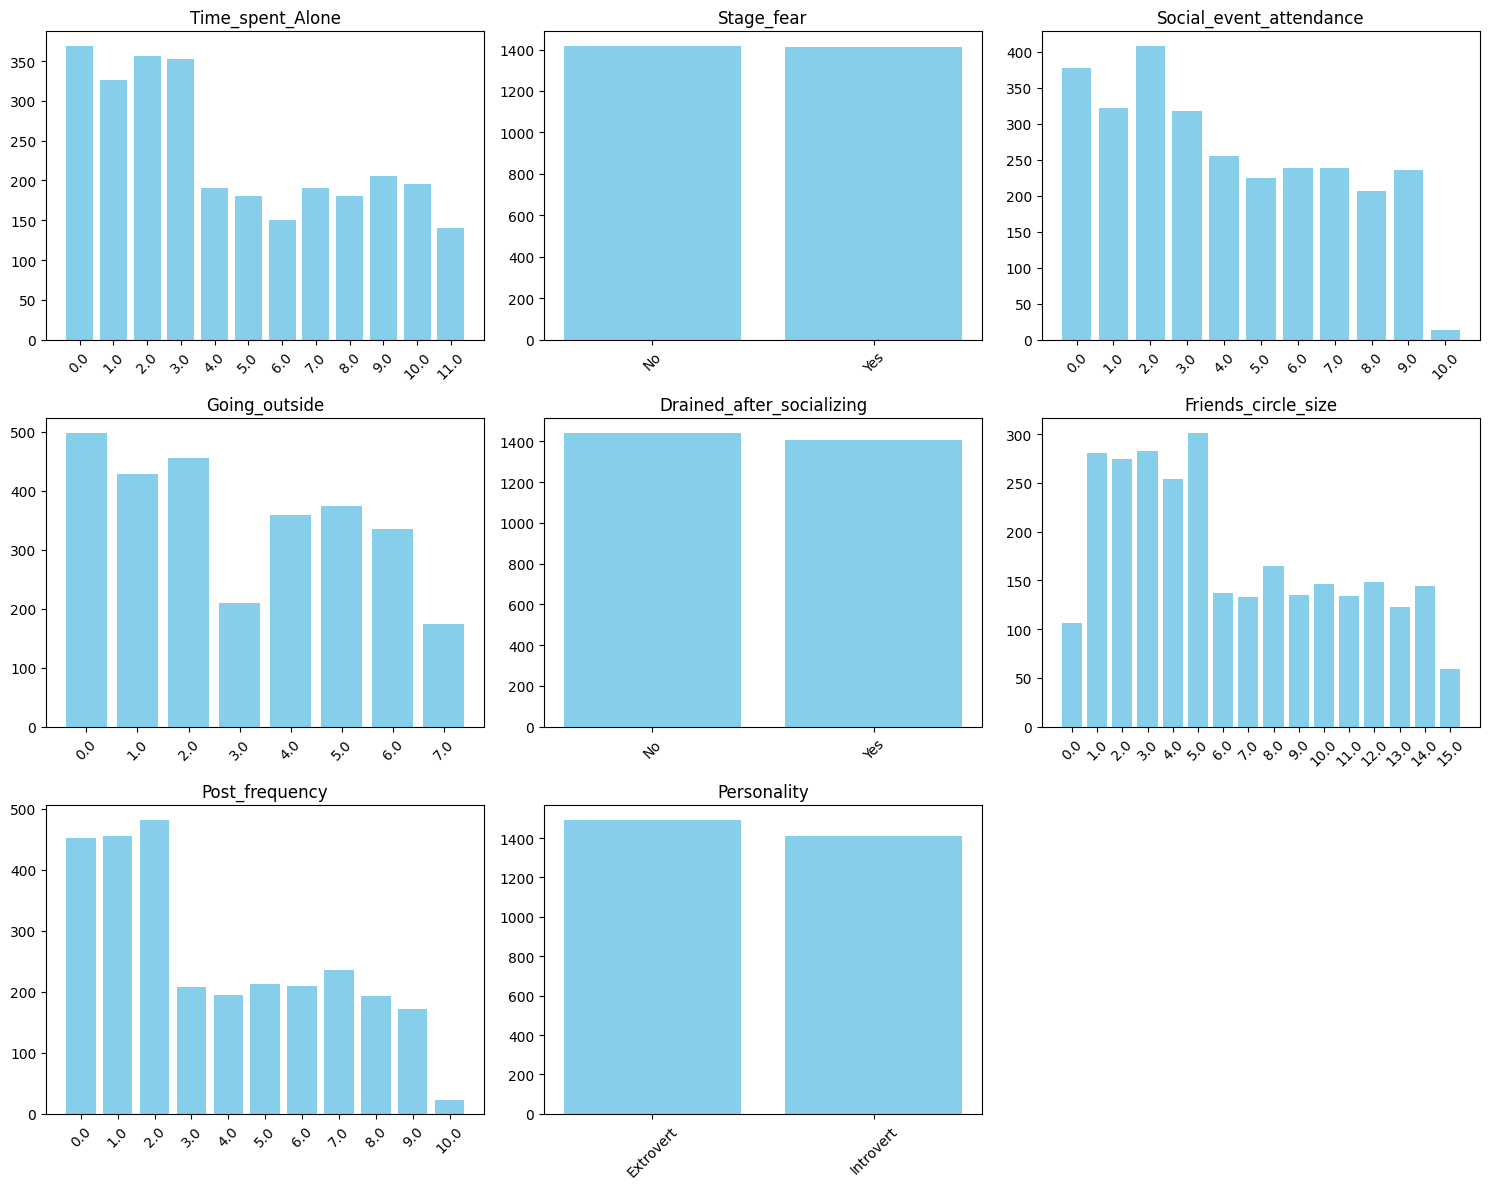

In [53]:
import matplotlib.pyplot as plt

# Set up the figure with subplots
num_cols = len(df.columns)
cols_per_row = 3  # Adjust for layout
rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
axes = axes.flatten()  # Flatten in case it's a 2D array of axes

# Plot each column
for i, column in enumerate(df.columns):
    value_counts = df[column].value_counts().sort_index()
    axes[i].bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if any)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [54]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [56]:
# filling null numbers with median, filling categorical values with mode.

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())  # Fill numeric with median
    else:
        # Fill categorical with mode (most frequent value)
        df[col] = df[col].fillna(df[col].mode()[0])

In [57]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

## 3. Check for duplicate rows

In [65]:
df.duplicated().sum()

448

In [67]:
df[df.duplicated()].head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
47,10.0,Yes,1.0,2.0,Yes,2.0,0.0,Introvert
217,5.0,Yes,2.0,0.0,Yes,2.0,0.0,Introvert
246,9.0,Yes,0.0,1.0,Yes,2.0,1.0,Introvert
248,9.0,Yes,0.0,2.0,Yes,3.0,2.0,Introvert
254,7.0,Yes,0.0,0.0,Yes,3.0,2.0,Introvert


In [68]:
# the duplictes seem to be just inidividuals with similar data, we cant know for sure due to lack of unique ID.

## Checking for Typos in categorical values.

In [74]:
cat_values = df.select_dtypes(['object'])
cat_values

,Stage_fear,Drained_after_socializing,Personality
0,No,No,Extrovert
1,Yes,Yes,Introvert
2,Yes,Yes,Introvert
3,No,No,Extrovert
4,No,No,Extrovert
...,...,...,...
2895,No,No,Extrovert
2896,No,No,Extrovert
2897,Yes,Yes,Introvert
2898,Yes,Yes,Introvert


In [82]:
print(df['Stage_fear'].unique())
print(df['Drained_after_socializing'].unique())
print(df['Personality'].unique())

['No' 'Yes']
['No' 'Yes']
['Extrovert' 'Introvert']


In [83]:
# seems clean

## Checking for Outliers

In [104]:
def detect_numerical_outliers(df, column):
    """
    Detects outliers in a numeric column using the IQR method.
    Returns a DataFrame of outliers and their bounds.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [105]:
# Implementing the function for numrical cols.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numrical_cols:
    outliers, lower, upper = detect_numerical_outliers(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    display(outliers.head() if not outliers.empty else "No outliers found.")


Column: Time_spent_Alone
Lower bound: -5.50, Upper bound: 14.50
Number of outliers: 0


'No outliers found.'


Column: Social_event_attendance
Lower bound: -4.00, Upper bound: 12.00
Number of outliers: 0


'No outliers found.'


Column: Going_outside
Lower bound: -5.00, Upper bound: 11.00
Number of outliers: 0


'No outliers found.'


Column: Friends_circle_size
Lower bound: -7.50, Upper bound: 20.50
Number of outliers: 0


'No outliers found.'


Column: Post_frequency
Lower bound: -6.50, Upper bound: 13.50
Number of outliers: 0


'No outliers found.'

In [108]:
df[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_spent_Alone         2900 non-null   float64
 1   Social_event_attendance  2900 non-null   float64
 2   Going_outside            2900 non-null   float64
 3   Friends_circle_size      2900 non-null   float64
 4   Post_frequency           2900 non-null   float64
dtypes: float64(5)
memory usage: 113.4 KB


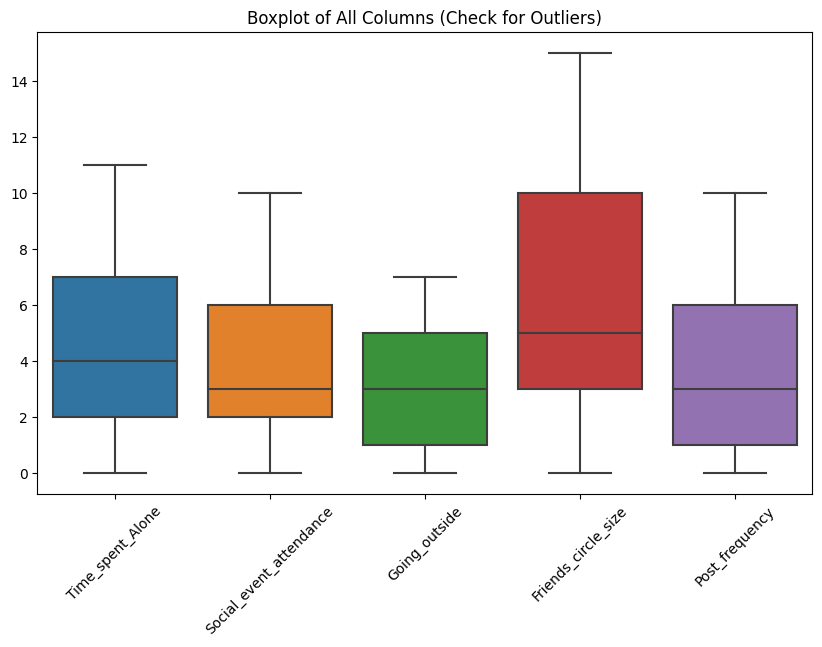

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of All Columns (Check for Outliers)")
plt.show()

In [112]:
# Outliers in categorical data involve values that appear infrequently.
def plot_category_distribution(df, column):
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of '{column}'")
    plt.show()

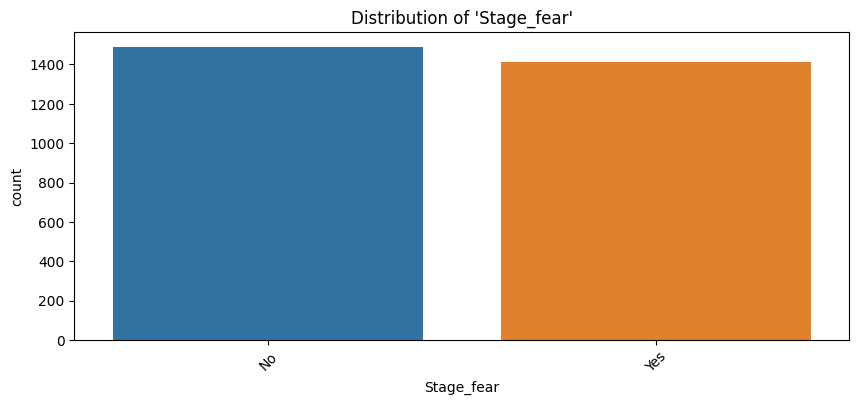

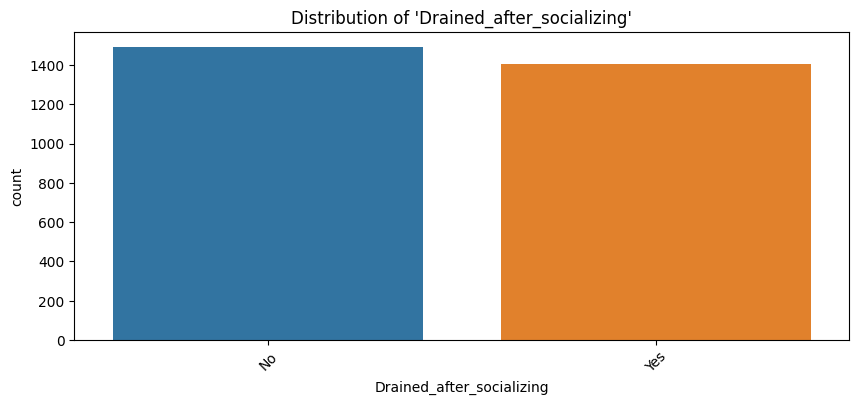

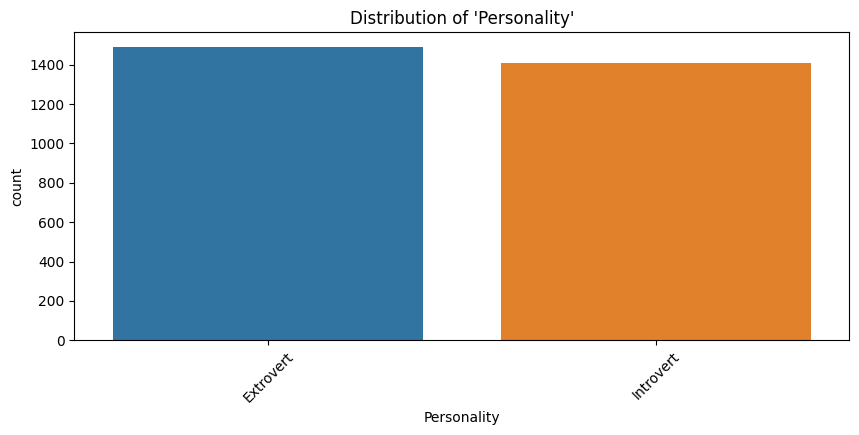

In [116]:
cat_columns = df.select_dtypes('object')
# cat_columns
for col in cat_columns:
    plot_category_distribution(cat_columns, col)

In [117]:
# No outliers present in categorical data.

# Exploratory Data Analysis (EDA)

## Goals.
- Analyze correlations between social behaviors and personality traits.
- Explore social media engagement patterns.
- Correlation between circle of friends and going outside.
- Stage fear vs attending Social events.

## Univariate Analysis

In [118]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')